ERROR: Could not find a version that satisfies the requirement bisect_left (from versions: none)
ERROR: No matching distribution found for bisect_left
You should consider upgrading via the 'c:\users\sgong\iclouddrive\astrofisica 20-21\formación y evolución de galaxias\practicas\practica_1\venv\scripts\python.exe -m pip install --upgrade pip' command.
          galaxyID  lastProgenitorId  descendantId         haloID  \
201  4000015000000     4000015001132            -1  4000015000000   

          subHaloID           fofID         treeId  firstProgenitorId  \
201  63000400000064  63000400000064  4000015000000      4000015000001   

     nextProgenitorId  type  ...  mag_rBulge  mag_iBulge  mag_kBulge  \
201                -1     0  ...   -22.22579  -22.841309  -24.351606   

     mag_bDust  mag_vDust  mag_rDust  mag_iDust  mag_kDust  massWeightedAge  \
201  -21.28468 -22.165306  -22.89357  -23.51599 -25.044708        11.997957   

     random  
201     671  

[1 rows x 62 columns]


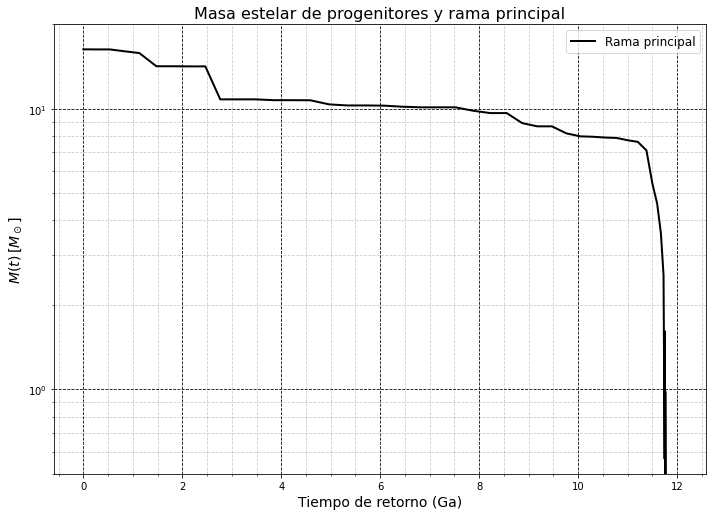

In [3]:
from os import getcwd

from bisect import bisect_left, bisect_right
import matplotlib.pyplot as plt
from numpy import arange, log10, nan
import pandas as pd

fig, ax = plt.subplots(figsize=(11.69, 8.27))

#fig.subplots_adjust(bottom=0.5)
main_df = pd.read_csv(getcwd() + '/datos/galaxias_13.csv')

# Obtiene el valor maximo y minimo de massWeightedAge
minWeightAge = min(main_df['massWeightedAge'])
maxWeightAge = max(main_df['massWeightedAge'])

# Divide en porciones
arrayWeightAge = arange(minWeightAge, maxWeightAge, 0.05)
longArrayWeightAge = arange(minWeightAge, maxWeightAge, 0.01)

# Obtiene los valores de masa del ultimo instante (step)
dfWeightAge = main_df[main_df['massWeightedAge'] > arrayWeightAge[-1]]
# Obtiene la fila de la galaxia con mas masa del ultimo instante
lastGalaxyRow = main_df[main_df['stellarMass'].isin([max(dfWeightAge['stellarMass'])])]

# Si tenemos dos valores (posiblemente por un error de redondeo obtenemos el más antiguo)
if lastGalaxyRow['treeId'].size != 1:
    lastGalaxyRow = lastGalaxyRow[lastGalaxyRow['massWeightedAge'].isin([max(lastGalaxyRow['massWeightedAge'])])]
    
#
# Obtenemos los valores del arbol
#
descendantId = lastGalaxyRow['galaxyID']
flag = True

descendant_ids_dict = {}
main_ids = []
main_snapnums = []
# Primera iteracion
temp_df = main_df[main_df['descendantId'].isin([descendantId])]
main_ids.append(int(descendantId))
descendant_ids_dict[int(descendantId)] = list(range(int(descendantId), int(temp_df['lastProgenitorId']), 1))
while flag:  
    nextGalaxyID = int(temp_df['galaxyID'])
    main_ids.append(nextGalaxyID)
    temp_df = main_df[main_df['descendantId'].isin([nextGalaxyID])]
    # Para el bucle si ya no hay datos
    if temp_df.empty:
        flag = False
        break
    descendant_ids_dict[nextGalaxyID] = list(range(int(nextGalaxyID), int(temp_df['lastProgenitorId']), 1))

#
# Obtenemos la masa y edad de la principal
# 
main_df = main_df[main_df['galaxyID'].isin(main_ids)]

main_stellarMass = []
main_weightedAge = []

# Metodo snapnum a snapnum
for snapnum_ in main_df['snapnum'].tolist():
    # Corta los datos en mass = 10
    temp_main_df = main_df[main_df['snapnum'].isin([snapnum_])]
    main_stellarMass.append(float(temp_main_df['stellarMass']))
    main_weightedAge.append(float(temp_main_df['massWeightedAge']))

# Obtiene el valor final de la masa
last_stellarMass = main_stellarMass[:1][0]

# Invierte las edades
main_weightedAge = [abs(i - max(main_weightedAge)) for i in main_weightedAge]


# Ordena las listas de la rama principal
main_lists = zip(*sorted(zip(main_weightedAge, main_stellarMass)))
main_weightedAge, main_stellarMass = (list(t) for t in main_lists)
# Corta en 0.5
final_main_weightedAge = []
final_main_stellarMass = []
for idx, stellarMass in enumerate(main_stellarMass):
    # if stellarMass > 0.5:
    if True:
        final_main_weightedAge.append(main_weightedAge[idx])
        final_main_stellarMass.append(stellarMass)
# Plotea el branch principal
# ax.plot(final_main_weightedAge, final_main_stellarMass, linestyle='-',color='black')
ax.plot(final_main_weightedAge, final_main_stellarMass, linestyle='-',color='black', linewidth=2, label='Rama principal')
ax.set_yscale('log')

# Pone el titulo de la grafica
ax.set_title('Masa estelar de progenitores y rama principal', fontsize=16)

# Pone nombre a los ejes
ax.set_xlabel('Tiempo de retorno (Ga)', fontsize=14)
# ax.set_ylabel('M')
ax.set_ylabel(r'$M(t)\:[M_\odot]$', fontsize=14)


# ax.set_yticks(arange(0, 20))
ax.set_ylim([0.5,20])

# Crea el grid
plt.grid(b=True, which='major', color='black', linestyle='dashed')
plt.grid(b=True, which='minor', color='black', linestyle='dashed', alpha=0.2)
plt.minorticks_on()

# Activa la leyenda
plt.legend(fontsize=12)

# Guarda la figura
plt.savefig('figura5.jpg')